/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice


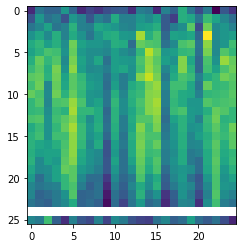

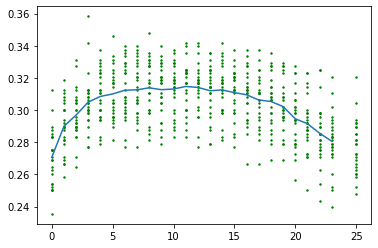

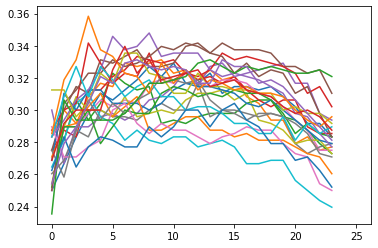

In [1]:
# To visualize the greedy result starting for 31 ROIs, in total 25 subjects.
import os
os.chdir("/gpfs/milgram/project/turk-browne/projects/rtTest/kp_scratch/")
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import subprocess
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
roiloc="schaefer2018"
dataSource="neurosketch"
subjects_correctly_aligned=['1206161','0119173','1206162','1130161','1206163','0120171','0111171','1202161','0125172','0110172','0123173','0120173','0110171','0119172','0124171','0123171','1203161','0118172','0118171','0112171','1207162','0117171','0119174','0112173','0112172']
subjects=subjects_correctly_aligned
N=25
workingPath="/gpfs/milgram/project/turk-browne/projects/rtTest/"
GreedyBestAcc=np.zeros((len(subjects),N+1))
GreedyBestAcc[GreedyBestAcc==0]=None
for ii,subject in enumerate(subjects):
    try:
        GreedyBestAcc[ii,N]=np.load(workingPath+"./{}/{}/output/uniMaskRanktag2_top{}.npy".format(roiloc, subject, N))
    except:
        pass

#     for len_topN_1 in range(N-1,0,-1):
    for len_topN_1 in range(1,N):
        # Wait(f"./tmp/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}.pkl")
        try:
            # print(f"./tmp/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            di = load_obj(f"./tmp_folder/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            GreedyBestAcc[ii,len_topN_1-1] = di['bestAcc']
        except:
            pass
GreedyBestAcc=GreedyBestAcc.T
plt.imshow(GreedyBestAcc)
_=plt.figure()
for i in range(GreedyBestAcc.shape[0]):
    plt.scatter([i]*GreedyBestAcc.shape[1],GreedyBestAcc[i],c='g',s=2)
plt.plot(np.arange(GreedyBestAcc.shape[0]),np.nanmean(GreedyBestAcc,axis=1))
# plt.ylim([0.19,0.36])
# plt.xlabel("number of ROIs")
# plt.ylabel("accuracy")


_=plt.figure()
for j in range(GreedyBestAcc.shape[1]):
    plt.plot(GreedyBestAcc[:,j])



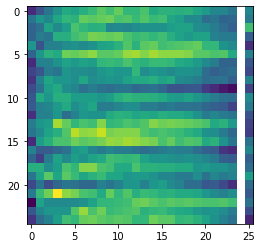

In [2]:
GreedyBestAcc=GreedyBestAcc.T
_=plt.figure()
plt.imshow(GreedyBestAcc)

In [4]:
#find best ID for each subject
bestID={}
for ii,subject in enumerate(subjects):
    t=GreedyBestAcc[ii]
    bestID[subject] = np.where(t==max(t))[0][0]
chosenMask={}
for subject in bestID:
    # best ID  
    di = load_obj(f"./tmp_folder/{subject}_{N}_{roiloc}_{dataSource}_{bestID[subject]+1}")
    chosenMask[subject] = di['bestROIs']

In [5]:
import os
print(f"conda env={os.environ['CONDA_DEFAULT_ENV']}") 
import numpy as np
import nibabel as nib
import sys
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
import itertools
import pickle
import subprocess
from subprocess import call
workingDir="/gpfs/milgram/project/turk-browne/projects/rtTest/"
def getMask(topN, subject):
    workingDir="/gpfs/milgram/project/turk-browne/projects/rtTest/"
    for pn, parc in enumerate(topN):
        _mask = nib.load(workingDir+"/{}/{}/{}".format(roiloc, subject, parc))
        aff = _mask.affine
        _mask = _mask.get_data()
        _mask = _mask.astype(int)
        # say some things about the mask.
        mask = _mask if pn == 0 else mask + _mask
        mask[mask>0] = 1
    return mask
for sub in chosenMask:
    mask=getMask(chosenMask[sub], sub)
    if not os.path.exists(f"{workingDir}/{roiloc}/{sub}/chosenMask.npy"):
        np.save(f"{workingDir}/{roiloc}/{sub}/chosenMask",mask)
    else:
        print("exist")



conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist


best 4way classifier accuracy =  0.3229166666666667
1--LENGTH OF TR: 80
shape of features (80, 2302) shape of mask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 2302) shape of mask (94, 94, 72)
3--LENGTH OF TR: 80
shape of features (80, 2302) shape of mask (94, 94, 72)
4--LENGTH OF TR: 80
shape of features (80, 2302) shape of mask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 2302) shape of mask (94, 94, 72)
6--LENGTH OF TR: 80
shape of features (80, 2302) shape of mask (94, 94, 72)
(480, 2302)
(480, 2)
FEAT.shape=(480, 2302)
obj=bed,altobj=chair
unique(trainY)=['bed' 'chair']
unique(testY)=['bed' 'chair']
bedbench_bedchair 0.45
obj=bed,altobj=table
unique(trainY)=['bed' 'table']
unique(testY)=['bed' 'table']
bedbench_bedtable 0.525
obj=bench,altobj=chair
unique(trainY)=['bench' 'chair']
unique(testY)=['bench' 'chair']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

bedbench_benchchair 0.525
obj=bench,altobj=table
unique(trainY)=['bench' 'table']
unique(testY)=['bench' 'table']
bedbench_benchtable 0.625
obj=bed,altobj=bench
unique(trainY)=['bed' 'bench']
unique(testY)=['bed' 'bench']
bedchair_bedbench 0.525
obj=bed,altobj=table
unique(trainY)=['bed' 'table']
unique(testY)=['bed' 'table']
bedchair_bedtable 0.525
obj=chair,altobj=bench
unique(trainY)=['bench' 'chair']
unique(testY)=['bench' 'chair']
bedchair_chairbench 0.525
obj=chair,altobj=table
unique(trainY)=['chair' 'table']
unique(testY)=['chair' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

bedchair_chairtable 0.575
obj=bed,altobj=bench
unique(trainY)=['bed' 'bench']
unique(testY)=['bed' 'bench']
bedtable_bedbench 0.525
obj=bed,altobj=chair
unique(trainY)=['bed' 'chair']
unique(testY)=['bed' 'chair']
bedtable_bedchair 0.45
obj=table,altobj=bench
unique(trainY)=['bench' 'table']
unique(testY)=['bench' 'table']
bedtable_tablebench 0.625
obj=table,altobj=chair
unique(trainY)=['chair' 'table']
unique(testY)=['chair' 'table']
bedtable_tablechair 0.575
obj=bench,altobj=bed
unique(trainY)=['bed' 'bench']
unique(testY)=['bed' 'bench']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

benchchair_benchbed 0.525
obj=bench,altobj=table
unique(trainY)=['bench' 'table']
unique(testY)=['bench' 'table']
benchchair_benchtable 0.625
obj=chair,altobj=bed
unique(trainY)=['bed' 'chair']
unique(testY)=['bed' 'chair']
benchchair_chairbed 0.45
obj=chair,altobj=table
unique(trainY)=['chair' 'table']
unique(testY)=['chair' 'table']
benchchair_chairtable 0.575
obj=bench,altobj=bed
unique(trainY)=['bed' 'bench']
unique(testY)=['bed' 'bench']
benchtable_benchbed 0.525
obj=bench,altobj=chair
unique(trainY)=['bench' 'chair']
unique(testY)=['bench' 'chair']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

benchtable_benchchair 0.525
obj=table,altobj=bed
unique(trainY)=['bed' 'table']
unique(testY)=['bed' 'table']
benchtable_tablebed 0.525
obj=table,altobj=chair
unique(trainY)=['chair' 'table']
unique(testY)=['chair' 'table']
benchtable_tablechair 0.575
obj=chair,altobj=bed
unique(trainY)=['bed' 'chair']
unique(testY)=['bed' 'chair']
chairtable_chairbed 0.45
obj=chair,altobj=bench
unique(trainY)=['bench' 'chair']
unique(testY)=['bench' 'chair']
chairtable_chairbench 0.525
obj=table,altobj=bed
unique(trainY)=['bed' 'table']
unique(testY)=['bed' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

chairtable_tablebed 0.525
obj=table,altobj=bench
unique(trainY)=['bench' 'table']
unique(testY)=['bench' 'table']
chairtable_tablebench 0.625
bedbench_bedchair 0.45
bedbench_bedtable 0.525
bedbench_benchchair 0.525
bedbench_benchtable 0.625
bedchair_bedbench 0.525
bedchair_bedtable 0.525
bedchair_chairbench 0.525
bedchair_chairtable 0.575
bedtable_bedbench 0.525
bedtable_bedchair 0.45
bedtable_tablebench 0.625
bedtable_tablechair 0.575
benchchair_benchbed 0.525
benchchair_benchtable 0.625
benchchair_chairbed 0.45
benchchair_chairtable 0.575
benchtable_benchbed 0.525
benchtable_benchchair 0.525
benchtable_tablebed 0.525
benchtable_tablechair 0.575
chairtable_chairbed 0.45
chairtable_chairbench 0.525
chairtable_tablebed 0.525
chairtable_tablebench 0.625


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

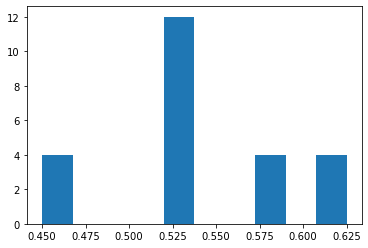

In [26]:
from scipy.stats import zscore
def normalize(X):
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

def mkdir(folder):
    if not os.path.isdir(folder):
        os.mkdir(folder)
'''
load the functional and behavior data and choseMask and train all possible pairs of 2way classifiers
''' 
def minimalClass(subject):
    '''
    purpose: 
        train offline models

    steps:
        load preprocessed and aligned behavior and brain data 
        select data with the wanted pattern like AB AC AD BC BD CD 
        train correspondng classifier and save the classifier performance and the classifiers themselves.

    '''

    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import sklearn
    import joblib
    import nibabel as nib
    import itertools
    from sklearn.linear_model import LogisticRegression

    def gaussian(x, mu, sig):
        # mu and sig is determined before each neurofeedback session using 2 recognition runs.
        return round(1+18*(1 - np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))) # map from (0,1) -> [1,19]

    def jitter(size,const=0):
        jit = np.random.normal(0+const, 0.05, size)
        X = np.zeros((size))
        X = X + jit
        return X

    def other(target):
        other_objs = [i for i in ['bed', 'bench', 'chair', 'table'] if i not in target]
        return other_objs

    def red_vox(n_vox, prop=0.1):
        return int(np.ceil(n_vox * prop))

    def get_inds(X, Y, pair, testRun=None):

        inds = {}

        # return relative indices
        if testRun:
            trainIX = Y.index[(Y['label'].isin(pair)) & (Y['run_num'] != int(testRun))]
        else:
            trainIX = Y.index[(Y['label'].isin(pair))]

        # pull training and test data
        trainX = X[trainIX]
        trainY = Y.iloc[trainIX].label

        # Main classifier on 5 runs, testing on 6th
        clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                multi_class='multinomial').fit(trainX, trainY)
        B = clf.coef_[0]  # pull betas

        # retrieve only the first object, then only the second object
        if testRun:
            obj1IX = Y.index[(Y['label'] == pair[0]) & (Y['run_num'] != int(testRun))]
            obj2IX = Y.index[(Y['label'] == pair[1]) & (Y['run_num'] != int(testRun))]
        else:
            obj1IX = Y.index[(Y['label'] == pair[0])]
            obj2IX = Y.index[(Y['label'] == pair[1])]

        # Get the average of the first object, then the second object
        obj1X = np.mean(X[obj1IX], 0)
        obj2X = np.mean(X[obj2IX], 0)

        # Build the importance map
        mult1X = obj1X * B
        mult2X = obj2X * B

        # Sort these so that they are from least to most important for a given category.
        sortmult1X = mult1X.argsort()[::-1]
        sortmult2X = mult2X.argsort()

        # add to a dictionary for later use
        inds[clf.classes_[0]] = sortmult1X
        inds[clf.classes_[1]] = sortmult2X

        return inds

    if 'milgram' in os.getcwd():
        main_dir='/gpfs/milgram/project/turk-browne/projects/rtTest/'
    else:
        main_dir='/Users/kailong/Desktop/rtTest'

    working_dir=main_dir
    os.chdir(working_dir)

    objects = ['bed', 'bench', 'chair', 'table']


    if dataSource == "neurosketch":
        funcdata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/{sub}_neurosketch/data/nifti/realtime_preprocessed/{sub}_neurosketch_recognition_run_{run}.nii.gz"
        metadata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/data/features/recog/metadata_{sub}_V1_{phase}.csv"
        anat = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/{sub}_neurosketch/data/nifti/{sub}_neurosketch_anat_mprage_brain.nii.gz"
    elif dataSource == "realtime":
        funcdata = "/gpfs/milgram/project/turk-browne/projects/rtcloud_kp/subjects/{sub}/ses{ses}_recognition/run0{run}/nifti/{sub}_functional.nii.gz"
        metadata = "/gpfs/milgram/project/turk-browne/projects/rtcloud_kp/subjects/{sub}/ses{ses}_recognition/run0{run}/{sub}_0{run}_preprocessed_behavData.csv"
        anat = "$TO_BE_FILLED"
    else:
        funcdata = "/gpfs/milgram/project/turk-browne/projects/rtTest/searchout/feat/{sub}_pre.nii.gz"
        metadata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/data/features/recog/metadata_{sub}_V1_{phase}.csv"
        anat = "$TO_BE_FILLED"

    # print('mask dimensions: {}'. format(mask.shape))
    # print('number of voxels in mask: {}'.format(np.sum(mask)))
    phasedict = dict(zip([1,2,3,4,5,6],["12", "12", "34", "34", "56", "56"]))
    imcodeDict={"A": "bed", "B": "Chair", "C": "table", "D": "bench"}
    chosenMask = np.load(f"/gpfs/milgram/project/turk-browne/projects/rtTest/schaefer2018/{subject}/chosenMask.npy")
    # Compile preprocessed data and corresponding indices
    metas = []
    for run in range(1, 7):
        print(run, end='--')
        # retrieve from the dictionary which phase it is, assign the session
        phase = phasedict[run]
        
        # Build the path for the preprocessed functional data
        this4d = funcdata.format(run=run, phase=phase, sub=subject)
        
        # Read in the metadata, and reduce it to only the TR values from this run, add to a list
        thismeta = pd.read_csv(metadata.format(run=run, phase=phase, sub=subject))
        if dataSource == "neurosketch":
            _run = 1 if run % 2 == 0 else 2
        else:
            _run = run
        thismeta = thismeta[thismeta['run_num'] == int(_run)]
        
        if dataSource == "realtime":
            TR_num = list(thismeta.TR.astype(int))
            labels = list(thismeta.Item)
            labels = [imcodeDict[label] for label in labels]
        else:
            TR_num = list(thismeta.TR_num.astype(int))
            labels = list(thismeta.label)
        
        print("LENGTH OF TR: {}".format(len(TR_num)))
        # Load the functional data
        runIm = nib.load(this4d)
        affine_mat = runIm.affine
        runImDat = runIm.get_fdata()
        
        # Use the TR numbers to select the correct features
        features = [runImDat[:,:,:,n+3] for n in TR_num]
        features = np.array(features)
        features = features[:, chosenMask==1]
        print("shape of features", features.shape, "shape of mask", mask.shape)
        # featmean = features.mean(1).mean(1).mean(1)[..., None,None,None] #features.mean(1)[..., None]
        # features = features - featmean
        # features = features - features.mean(0)
        features = normalize(features)
    #     features = np.expand_dims(features, 0)
        
        # Append both so we can use it later
    #     metas.append(labels)
    #     metas['label']

        t=pd.DataFrame()
        t['label']=labels
        t["run_num"]=run
        behav_data=t if run==1 else pd.concat([behav_data,t])
        
        runs = features if run == 1 else np.concatenate((runs, features))

    dimsize = runIm.header.get_zooms()
    
    brain_data = runs
    print(brain_data.shape)
    print(behav_data.shape)
    FEAT=brain_data
    print(f"FEAT.shape={FEAT.shape}")
    META=behav_data

    # convert item colume to label colume
    imcodeDict={
    'A': 'bed',
    'B': 'chair',
    'C': 'table',
    'D': 'bench'}

    # Which run to use as test data (leave as None to not have test data)
    testRun = 1 # when testing: testRun = 2 ; META['run_num'].iloc[:5]=2

    # Decide on the proportion of crescent data to use for classification
    include = 1
    objects = ['bed', 'bench', 'chair', 'table']
    allpairs = itertools.combinations(objects,2)
    accs={}
    # Iterate over all the possible target pairs of objects
    for pair in allpairs:
        # Find the control (remaining) objects for this pair
        altpair = other(pair)

        # pull sorted indices for each of the critical objects, in order of importance (low to high)
        # inds = get_inds(FEAT, META, pair, testRun=testRun)

        # Find the number of voxels that will be left given your inclusion parameter above
        # nvox = red_vox(FEAT.shape[1], include)

        for obj in pair:
            # foil = [i for i in pair if i != obj][0]
            for altobj in altpair:

                # establish a naming convention where it is $TARGET_$CLASSIFICATION
                # Target is the NF pair (e.g. bed/bench)
                # Classificationis is btw one of the targets, and a control (e.g. bed/chair, or bed/table, NOT bed/bench)
                naming = '{}{}_{}{}'.format(pair[0], pair[1], obj, altobj)

                # Pull the relevant inds from your previously established dictionary 
                # obj_inds = inds[obj]

                # If you're using testdata, this function will split it up. Otherwise it leaves out run as a parameter
                # if testRun:
                #     trainIX = META.index[(META['label'].isin([obj, altobj])) & (META['run_num'] != int(testRun))]
                #     testIX = META.index[(META['label'].isin([obj, altobj])) & (META['run_num'] == int(testRun))]
                # else:
                #     trainIX = META.index[(META['label'].isin([obj, altobj]))]
                #     testIX = META.index[(META['label'].isin([obj, altobj]))]
                # # pull training and test data
                # trainX = FEAT[trainIX]
                # testX = FEAT[testIX]
                # trainY = META.iloc[trainIX].label
                # testY = META.iloc[testIX].label

                # print(f"obj={obj},altobj={altobj}")
                # print(f"unique(trainY)={np.unique(trainY)}")
                # print(f"unique(testY)={np.unique(testY)}")
                # assert len(np.unique(trainY))==2

                # for testRun in range(6):
                if testRun:
                    trainIX = ((META['label']==obj) + (META['label']==altobj)) * (META['run_num']!=int(testRun))
                    testIX = ((META['label']==obj) + (META['label']==altobj)) * (META['run_num']==int(testRun))
                else:
                    trainIX = ((META['label']==obj) + (META['label']==altobj))
                    testIX = ((META['label']==obj) + (META['label']==altobj))
                # pull training and test data
                trainX = FEAT[trainIX]
                testX = FEAT[testIX]
                trainY = META.iloc[np.asarray(trainIX)].label
                testY = META.iloc[np.asarray(testIX)].label

                print(f"obj={obj},altobj={altobj}")
                print(f"unique(trainY)={np.unique(trainY)}")
                print(f"unique(testY)={np.unique(testY)}")
                assert len(np.unique(trainY))==2

                # # If you're selecting high-importance features, this bit handles that
                # if include < 1:
                #     trainX = trainX[:, obj_inds[-nvox:]]
                #     testX = testX[:, obj_inds[-nvox:]]

                # Train your classifier
                clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                        multi_class='multinomial').fit(trainX, trainY)


                model_folder = f"{working_dir}{roiloc}/{subject}/clf/"
                mkdir(model_folder)
                # Save it for later use
                joblib.dump(clf, model_folder +'/{}.joblib'.format(naming))

                # Monitor progress by printing accuracy (only useful if you're running a test set)
                acc = clf.score(testX, testY)
                print(naming, acc)
                accs[naming]=acc
    
    _=plt.figure()
    _=plt.hist(list(accs.values()))
    return accs 

sub_id=2
subject=subjects[sub_id]
print("best 4way classifier accuracy = ",GreedyBestAcc[sub_id][bestID[subjects[sub_id]]])
accs = minimalClass(subject)

for acc in accs:
    print(acc,accs[acc])


In [25]:
'''
calculate the evidence floor and ceil for each subject and display different forms of evidences.
'''
def morphingTarget(subject):
    '''
    purpose:
        get the morphing target function
    steps:
        load train clf
        load brain data and behavior data
        get the morphing target function
            evidence_floor is C evidence for CD classifier(can also be D evidence for CD classifier)
            evidence_ceil  is A evidence in AC and AD classifier
    '''

    import os
    import numpy as np
    import pandas as pd
    import joblib
    import nibabel as nib


    phasedict = dict(zip([1,2,3,4,5,6],["12", "12", "34", "34", "56", "56"]))
    imcodeDict={"A": "bed", "B": "Chair", "C": "table", "D": "bench"}
    if 'milgram' in os.getcwd():
        main_dir='/gpfs/milgram/project/turk-browne/projects/rtTest/'
    else:
        main_dir='/Users/kailong/Desktop/rtTest'

    working_dir=main_dir
    os.chdir(working_dir)

    funcdata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/{sub}_neurosketch/data/nifti/realtime_preprocessed/{sub}_neurosketch_recognition_run_{run}.nii.gz"
    metadata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/data/features/recog/metadata_{sub}_V1_{phase}.csv"

    metas = []
    for run in range(1, 7):
        print(run, end='--')
        # retrieve from the dictionary which phase it is, assign the session
        phase = phasedict[run]
        ses = 1
        
        # Build the path for the preprocessed functional data
        this4d = funcdata.format(ses=ses, run=run, phase=phase, sub=subject)
        
        # Read in the metadata, and reduce it to only the TR values from this run, add to a list
        thismeta = pd.read_csv(metadata.format(ses=ses, run=run, phase=phase, sub=subject))
        if dataSource == "neurosketch":
            _run = 1 if run % 2 == 0 else 2
        else:
            _run = run
        thismeta = thismeta[thismeta['run_num'] == int(_run)]
        
        if dataSource == "realtime":
            TR_num = list(thismeta.TR.astype(int))
            labels = list(thismeta.Item)
            labels = [imcodeDict[label] for label in labels]
        else:
            TR_num = list(thismeta.TR_num.astype(int))
            labels = list(thismeta.label)
        
        print("LENGTH OF TR: {}".format(len(TR_num)))
        # Load the functional data
        runIm = nib.load(this4d)
        affine_mat = runIm.affine
        runImDat = runIm.get_fdata()
        
        # Use the TR numbers to select the correct features
        features = [runImDat[:,:,:,n+3] for n in TR_num]
        features = np.array(features)
        chosenMask = np.load(f"/gpfs/milgram/project/turk-browne/projects/rtTest/schaefer2018/{subject}/chosenMask.npy")
        features = features[:, chosenMask==1]
        print("shape of features", features.shape, "shape of mask", mask.shape)
        # featmean = features.mean(1).mean(1).mean(1)[..., None,None,None] #features.mean(1)[..., None]
        # features = features - featmean
        # features = features - features.mean(0)
        features = normalize(features)
        # features = np.expand_dims(features, 0)
        
        # Append both so we can use it later
        # metas.append(labels)
        # metas['label']

        t=pd.DataFrame()
        t['label']=labels
        t["run_num"]=run
        behav_data=t if run==1 else pd.concat([behav_data,t])
        
        runs = features if run == 1 else np.concatenate((runs, features))

    dimsize = runIm.header.get_zooms()
    
    brain_data = runs
    print(brain_data.shape)
    print(behav_data.shape)
    FEAT=brain_data
    print(f"FEAT.shape={FEAT.shape}")
    META=behav_data

    # print('mask dimensions: {}'. format(mask.shape))
    # print('number of voxels in mask: {}'.format(np.sum(mask)))

    # runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
    # actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]

    # objects = ['bed', 'bench', 'chair', 'table']

    # for ii,run in enumerate(actualRuns[:2]): # load behavior and brain data for current session
    #     t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
    #     # mask = nib.load(f"{cfg.chosenMask}").get_data()
    #     mask = np.load(cfg.chosenMask)
    #     t = t[:,mask==1]
    #     t = normalize(t)
    #     brain_data=t if ii==0 else np.concatenate((brain_data,t), axis=0)

    #     t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
    #     behav_data=t if ii==0 else pd.concat([behav_data,t])

    # FEAT=brain_data.reshape(brain_data.shape[0],-1)
    # # FEAT_mean=np.mean(FEAT,axis=1)
    # # FEAT=(FEAT.T-FEAT_mean).T
    # # FEAT_mean=np.mean(FEAT,axis=0)
    # # FEAT=FEAT-FEAT_mean

    # META=behav_data

    # convert item colume to label colume
    imcodeDict={
    'A': 'bed',
    'B': 'chair',
    'C': 'table',
    'D': 'bench'}
    # label=[]
    # for curr_trial in range(META.shape[0]):
    #     label.append(imcodeDict[META['Item'].iloc[curr_trial]])
    # META['label']=label # merge the label column with the data dataframe


    # def classifierEvidence(clf,X,Y): # X shape is [trials,voxelNumber], Y is ['bed', 'bed'] for example # return a 1-d array of probability
    #     # This function get the data X and evidence object I want to know Y, and output the trained model evidence.
    #     targetID=[np.where((clf.classes_==i)==True)[0][0] for i in Y]
    #     # Evidence=(np.sum(X*clf.coef_,axis=1)+clf.intercept_) if targetID[0]==1 else (1-(np.sum(X*clf.coef_,axis=1)+clf.intercept_))
    #     Evidence=(X@clf.coef_.T+clf.intercept_) if targetID[0]==1 else (-(X@clf.coef_.T+clf.intercept_))
    #     Evidence = 1/(1+np.exp(-Evidence))
    #     return np.asarray(Evidence)

    # def classifierEvidence(clf,X,Y):
    #     ID=np.where((clf.classes_==Y[0])*1==1)[0][0]
    #     p = clf.predict_proba(X)[:,ID]
    #     BX=np.log(p/(1-p))
    #     return BX

    def classifierEvidence(clf,X,Y):
        ID=np.where((clf.classes_==Y[0])*1==1)[0][0]
        Evidence=(X@clf.coef_.T+clf.intercept_) if ID==1 else (-(X@clf.coef_.T+clf.intercept_))
        # Evidence=(X@clf.coef_.T+clf.intercept_) if ID==0 else (-(X@clf.coef_.T+clf.intercept_))
        return np.asarray(Evidence)

    A_ID = (META['label']=='bed')
    X = FEAT[A_ID]

    # evidence_floor is C evidence for AC_CD BC_CD CD_CD classifier(can also be D evidence for CD classifier)
    # Y = ['table'] * X.shape[0]
    # CD_clf=joblib.load(cfg.usingModel_dir +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    # CD_C_evidence = classifierEvidence(CD_clf,X,Y)
    # evidence_floor = np.mean(CD_C_evidence)
    # print(f"evidence_floor={evidence_floor}")

    model_folder = f"{working_dir}{roiloc}/{subject}/clf/"

    # #try out other forms of floor: C evidence in AC and D evidence for AD
    # Y = ['bench'] * X.shape[0]
    # AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
    # AD_D_evidence = classifierEvidence(AD_clf,X,Y)
    # evidence_floor = np.mean(AD_D_evidence)
    # print(f"evidence_floor2={np.mean(evidence_floor)}")



    # # floor
    # Y = ['bench'] * X.shape[0]
    # CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    # CD_D_evidence = classifierEvidence(CD_clf,X,Y)
    # evidence_floor = np.mean(CD_D_evidence)
    # print(f"evidence_floor={evidence_floor}")

    # Y = ['table'] * X.shape[0]
    # CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    # CD_C_evidence = classifierEvidence(CD_clf,X,Y)
    # evidence_floor = np.mean(CD_C_evidence)
    # print(f"evidence_floor={evidence_floor}")


    # # evidence_ceil  is A evidence in AC and AD classifier
    # Y = ['bed'] * X.shape[0]
    # AC_clf=joblib.load(model_folder +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
    # AC_A_evidence = classifierEvidence(AC_clf,X,Y)
    # evidence_ceil1 = AC_A_evidence
    # print(f"evidence_ceil1={np.mean(evidence_ceil1)}")

    # Y = ['bed'] * X.shape[0]
    # AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
    # AD_A_evidence = classifierEvidence(AD_clf,X,Y)
    # evidence_ceil2 = AD_A_evidence
    # print(f"evidence_ceil2={np.mean(evidence_ceil2)}")

    # # evidence_ceil = np.mean(evidence_ceil1)
    # # evidence_ceil = np.mean(evidence_ceil2)
    # evidence_ceil = np.mean((evidence_ceil1+evidence_ceil2)/2)
    # print(f"evidence_ceil={evidence_ceil}")

    print("floor")
    # D evidence for AD_clf when A is presented.
    Y = ['bench'] * X.shape[0]
    AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
    AD_D_evidence = classifierEvidence(AD_clf,X,Y)
    evidence_floor = np.mean(AD_D_evidence)
    print(f"D evidence for AD_clf when A is presented={evidence_floor}")

    # C evidence for AC_clf when A is presented.
    Y = ['table'] * X.shape[0]
    AC_clf=joblib.load(model_folder +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
    AC_C_evidence = classifierEvidence(AC_clf,X,Y)
    evidence_floor = np.mean(AC_C_evidence)
    print(f"C evidence for AC_clf when A is presented={evidence_floor}")


    # D evidence for CD_clf when A is presented.
    Y = ['bench'] * X.shape[0]
    CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    CD_D_evidence = classifierEvidence(CD_clf,X,Y)
    evidence_floor = np.mean(CD_D_evidence)
    print(f"D evidence for CD_clf when A is presented={evidence_floor}")

    # C evidence for CD_clf when A is presented.
    Y = ['table'] * X.shape[0]
    CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    CD_C_evidence = classifierEvidence(CD_clf,X,Y)
    evidence_floor = np.mean(CD_C_evidence)
    print(f"C evidence for CD_clf when A is presented={evidence_floor}")





    print("ceil")
    # evidence_ceil  is A evidence in AC and AD classifier
    Y = ['bed'] * X.shape[0]
    AC_clf=joblib.load(model_folder +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
    AC_A_evidence = classifierEvidence(AC_clf,X,Y)
    evidence_ceil1 = AC_A_evidence
    print(f"A evidence in AC_clf when A is presented={np.mean(evidence_ceil1)}")

    Y = ['bed'] * X.shape[0]
    AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
    AD_A_evidence = classifierEvidence(AD_clf,X,Y)
    evidence_ceil2 = AD_A_evidence
    print(f"A evidence in AD_clf when A is presented={np.mean(evidence_ceil2)}")

    # evidence_ceil = np.mean(evidence_ceil1)
    # evidence_ceil = np.mean(evidence_ceil2)
    evidence_ceil = np.mean((evidence_ceil1+evidence_ceil2)/2)
    print(f"evidence_ceil={evidence_ceil}")

    return evidence_floor, evidence_ceil
    
floor, ceil = morphingTarget(subject)
mu = (ceil+floor)/2
sig = (ceil-floor)/2.3548
print(f"floor={floor}, ceil={ceil}")
print(f"mu={mu}, sig={sig}")


1--LENGTH OF TR: 80
shape of features (80, 3294) shape of mask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 3294) shape of mask (94, 94, 72)
3--LENGTH OF TR: 80


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


shape of features (80, 3294) shape of mask (94, 94, 72)
4--LENGTH OF TR: 80


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


shape of features (80, 3294) shape of mask (94, 94, 72)
5--LENGTH OF TR: 80
shape of features (80, 3294) shape of mask (94, 94, 72)
6--LENGTH OF TR: 80


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


shape of features (80, 3294) shape of mask (94, 94, 72)
(480, 3294)
(480, 2)
FEAT.shape=(480, 3294)
floor
D evidence for AD_clf when A is presented=-2.769375064695717
C evidence for AC_clf when A is presented=-2.816748295966188
D evidence for CD_clf when A is presented=0.149285651665016
C evidence for CD_clf when A is presented=-0.149285651665016
ceil
A evidence in AC_clf when A is presented=2.816748295966188
A evidence in AD_clf when A is presented=2.769375064695717
evidence_ceil=2.7930616803309527
floor=-0.149285651665016, ceil=2.7930616803309527
mu=1.3218880143329683, sig=1.2495105028010738


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [19]:
# '''
# calculate the evidence floor and ceil for each subject and display different forms of evidences.
# '''
# def morphingTarget(subject):
#     '''
#     purpose:
#         get the morphing target function
#     steps:
#         load train clf
#         load brain data and behavior data
#         get the morphing target function
#             evidence_floor is C evidence for CD classifier(can also be D evidence for CD classifier)
#             evidence_ceil  is A evidence in AC and AD classifier
#     '''

#     import os
#     import numpy as np
#     import pandas as pd
#     import joblib
#     import nibabel as nib


#     phasedict = dict(zip([1,2,3,4,5,6],["12", "12", "34", "34", "56", "56"]))
#     imcodeDict={"A": "bed", "B": "Chair", "C": "table", "D": "bench"}
#     if 'milgram' in os.getcwd():
#         main_dir='/gpfs/milgram/project/turk-browne/projects/rtTest/'
#     else:
#         main_dir='/Users/kailong/Desktop/rtTest'

#     working_dir=main_dir
#     os.chdir(working_dir)

#     funcdata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/{sub}_neurosketch/data/nifti/realtime_preprocessed/{sub}_neurosketch_recognition_run_{run}.nii.gz"
#     metadata = "/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/data/features/recog/metadata_{sub}_V1_{phase}.csv"

#     metas = []
#     for run in range(1, 7):
#         print(run, end='--')
#         # retrieve from the dictionary which phase it is, assign the session
#         phase = phasedict[run]
#         ses = 1
        
#         # Build the path for the preprocessed functional data
#         this4d = funcdata.format(ses=ses, run=run, phase=phase, sub=subject)
        
#         # Read in the metadata, and reduce it to only the TR values from this run, add to a list
#         thismeta = pd.read_csv(metadata.format(ses=ses, run=run, phase=phase, sub=subject))
#         if dataSource == "neurosketch":
#             _run = 1 if run % 2 == 0 else 2
#         else:
#             _run = run
#         thismeta = thismeta[thismeta['run_num'] == int(_run)]
        
#         if dataSource == "realtime":
#             TR_num = list(thismeta.TR.astype(int))
#             labels = list(thismeta.Item)
#             labels = [imcodeDict[label] for label in labels]
#         else:
#             TR_num = list(thismeta.TR_num.astype(int))
#             labels = list(thismeta.label)
        
#         print("LENGTH OF TR: {}".format(len(TR_num)))
#         # Load the functional data
#         runIm = nib.load(this4d)
#         affine_mat = runIm.affine
#         runImDat = runIm.get_fdata()
        
#         # Use the TR numbers to select the correct features
#         features = [runImDat[:,:,:,n+3] for n in TR_num]
#         features = np.array(features)
#         chosenMask = np.load(f"/gpfs/milgram/project/turk-browne/projects/rtTest/schaefer2018/{subject}/chosenMask.npy")
#         features = features[:, chosenMask==1]
#         print("shape of features", features.shape, "shape of mask", mask.shape)
#         # featmean = features.mean(1).mean(1).mean(1)[..., None,None,None] #features.mean(1)[..., None]
#         # features = features - featmean
#         # features = features - features.mean(0)
#         features = normalize(features)
#         # features = np.expand_dims(features, 0)
        
#         # Append both so we can use it later
#         # metas.append(labels)
#         # metas['label']

#         t=pd.DataFrame()
#         t['label']=labels
#         t["run_num"]=run
#         behav_data=t if run==1 else pd.concat([behav_data,t])
        
#         runs = features if run == 1 else np.concatenate((runs, features))

#     dimsize = runIm.header.get_zooms()
    
#     brain_data = runs
#     print(brain_data.shape)
#     print(behav_data.shape)
#     FEAT=brain_data
#     print(f"FEAT.shape={FEAT.shape}")
#     META=behav_data

#     # print('mask dimensions: {}'. format(mask.shape))
#     # print('number of voxels in mask: {}'.format(np.sum(mask)))

#     # runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
#     # actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]

#     # objects = ['bed', 'bench', 'chair', 'table']

#     # for ii,run in enumerate(actualRuns[:2]): # load behavior and brain data for current session
#     #     t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
#     #     # mask = nib.load(f"{cfg.chosenMask}").get_data()
#     #     mask = np.load(cfg.chosenMask)
#     #     t = t[:,mask==1]
#     #     t = normalize(t)
#     #     brain_data=t if ii==0 else np.concatenate((brain_data,t), axis=0)

#     #     t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
#     #     behav_data=t if ii==0 else pd.concat([behav_data,t])

#     # FEAT=brain_data.reshape(brain_data.shape[0],-1)
#     # # FEAT_mean=np.mean(FEAT,axis=1)
#     # # FEAT=(FEAT.T-FEAT_mean).T
#     # # FEAT_mean=np.mean(FEAT,axis=0)
#     # # FEAT=FEAT-FEAT_mean

#     # META=behav_data

#     # convert item colume to label colume
#     imcodeDict={
#     'A': 'bed',
#     'B': 'chair',
#     'C': 'table',
#     'D': 'bench'}
#     # label=[]
#     # for curr_trial in range(META.shape[0]):
#     #     label.append(imcodeDict[META['Item'].iloc[curr_trial]])
#     # META['label']=label # merge the label column with the data dataframe


#     # def classifierEvidence(clf,X,Y): # X shape is [trials,voxelNumber], Y is ['bed', 'bed'] for example # return a 1-d array of probability
#     #     # This function get the data X and evidence object I want to know Y, and output the trained model evidence.
#     #     targetID=[np.where((clf.classes_==i)==True)[0][0] for i in Y]
#     #     # Evidence=(np.sum(X*clf.coef_,axis=1)+clf.intercept_) if targetID[0]==1 else (1-(np.sum(X*clf.coef_,axis=1)+clf.intercept_))
#     #     Evidence=(X@clf.coef_.T+clf.intercept_) if targetID[0]==1 else (-(X@clf.coef_.T+clf.intercept_))
#     #     Evidence = 1/(1+np.exp(-Evidence))
#     #     return np.asarray(Evidence)

#     # def classifierEvidence(clf,X,Y):
#     #     ID=np.where((clf.classes_==Y[0])*1==1)[0][0]
#     #     p = clf.predict_proba(X)[:,ID]
#     #     BX=np.log(p/(1-p))
#     #     return BX

#     def classifierEvidence(clf,X,Y):
#         ID=np.where((clf.classes_==Y[0])*1==1)[0][0]
#         Evidence=(X@clf.coef_.T+clf.intercept_) if ID==1 else (-(X@clf.coef_.T+clf.intercept_))
#         # Evidence=(X@clf.coef_.T+clf.intercept_) if ID==0 else (-(X@clf.coef_.T+clf.intercept_))
#         return np.asarray(Evidence)

#     A_ID = (META['label']=='bed')
#     X = FEAT[A_ID]

#     # evidence_floor is C evidence for AC_CD BC_CD CD_CD classifier(can also be D evidence for CD classifier)
#     # Y = ['table'] * X.shape[0]
#     # CD_clf=joblib.load(cfg.usingModel_dir +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
#     # CD_C_evidence = classifierEvidence(CD_clf,X,Y)
#     # evidence_floor = np.mean(CD_C_evidence)
#     # print(f"evidence_floor={evidence_floor}")

#     model_folder = f"{working_dir}{roiloc}/{subject}/clf/"

#     # #try out other forms of floor: C evidence in AC and D evidence for AD
#     # Y = ['bench'] * X.shape[0]
#     # AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
#     # AD_D_evidence = classifierEvidence(AD_clf,X,Y)
#     # evidence_floor = np.mean(AD_D_evidence)
#     # print(f"evidence_floor2={np.mean(evidence_floor)}")



#     # # floor
#     # Y = ['bench'] * X.shape[0]
#     # CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
#     # CD_D_evidence = classifierEvidence(CD_clf,X,Y)
#     # evidence_floor = np.mean(CD_D_evidence)
#     # print(f"evidence_floor={evidence_floor}")

#     # Y = ['table'] * X.shape[0]
#     # CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
#     # CD_C_evidence = classifierEvidence(CD_clf,X,Y)
#     # evidence_floor = np.mean(CD_C_evidence)
#     # print(f"evidence_floor={evidence_floor}")


#     # # evidence_ceil  is A evidence in AC and AD classifier
#     # Y = ['bed'] * X.shape[0]
#     # AC_clf=joblib.load(model_folder +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
#     # AC_A_evidence = classifierEvidence(AC_clf,X,Y)
#     # evidence_ceil1 = AC_A_evidence
#     # print(f"evidence_ceil1={np.mean(evidence_ceil1)}")

#     # Y = ['bed'] * X.shape[0]
#     # AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
#     # AD_A_evidence = classifierEvidence(AD_clf,X,Y)
#     # evidence_ceil2 = AD_A_evidence
#     # print(f"evidence_ceil2={np.mean(evidence_ceil2)}")

#     # # evidence_ceil = np.mean(evidence_ceil1)
#     # # evidence_ceil = np.mean(evidence_ceil2)
#     # evidence_ceil = np.mean((evidence_ceil1+evidence_ceil2)/2)
#     # print(f"evidence_ceil={evidence_ceil}")

#     print("floor")
#     # D evidence for AD_clf when A is presented.
#     Y = ['bench'] * X.shape[0]
#     AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
#     AD_D_evidence = classifierEvidence(AD_clf,X,Y)
#     evidence_floor = np.mean(AD_D_evidence)
#     print(f"D evidence for AD_clf when A is presented={evidence_floor}")

#     # C evidence for AC_clf when A is presented.
#     Y = ['table'] * X.shape[0]
#     AC_clf=joblib.load(model_folder +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
#     AC_C_evidence = classifierEvidence(AC_clf,X,Y)
#     evidence_floor = np.mean(AC_C_evidence)
#     print(f"C evidence for AC_clf when A is presented={evidence_floor}")


#     # D evidence for CD_clf when A is presented.
#     Y = ['bench'] * X.shape[0]
#     CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
#     CD_D_evidence = classifierEvidence(CD_clf,X,Y)
#     evidence_floor = np.mean(CD_D_evidence)
#     print(f"D evidence for CD_clf when A is presented={evidence_floor}")

#     # C evidence for CD_clf when A is presented.
#     Y = ['table'] * X.shape[0]
#     CD_clf=joblib.load(model_folder +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
#     CD_C_evidence = classifierEvidence(CD_clf,X,Y)
#     evidence_floor = np.mean(CD_C_evidence)
#     print(f"C evidence for CD_clf when A is presented={evidence_floor}")





#     print("ceil")
#     # evidence_ceil  is A evidence in AC and AD classifier
#     Y = ['bed'] * X.shape[0]
#     AC_clf=joblib.load(model_folder +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
#     AC_A_evidence = classifierEvidence(AC_clf,X,Y)
#     evidence_ceil1 = AC_A_evidence
#     print(f"A evidence in AC_clf when A is presented={np.mean(evidence_ceil1)}")

#     Y = ['bed'] * X.shape[0]
#     AD_clf=joblib.load(model_folder +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
#     AD_A_evidence = classifierEvidence(AD_clf,X,Y)
#     evidence_ceil2 = AD_A_evidence
#     print(f"A evidence in AD_clf when A is presented={np.mean(evidence_ceil2)}")

#     # evidence_ceil = np.mean(evidence_ceil1)
#     # evidence_ceil = np.mean(evidence_ceil2)
#     evidence_ceil = np.mean((evidence_ceil1+evidence_ceil2)/2)
#     print(f"evidence_ceil={evidence_ceil}")

#     return evidence_floor, evidence_ceil
    


# floor, ceil = morphingTarget(subject)
# mu = (ceil+floor)/2
# sig = (ceil-floor)/2.3548
# print(f"floor={floor}, ceil={ceil}")
# print(f"mu={mu}, sig={sig}")

1--LENGTH OF TR: 80
shape of features (80, 4949) shape of mask (94, 94, 72)
2--LENGTH OF TR: 80
shape of features (80, 4949) shape of mask (94, 94, 72)
3--LENGTH OF TR: 80


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


shape of features (80, 4949) shape of mask (94, 94, 72)
4--LENGTH OF TR: 80


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


shape of features (80, 4949) shape of mask (94, 94, 72)
5--LENGTH OF TR: 80


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


shape of features (80, 4949) shape of mask (94, 94, 72)
6--LENGTH OF TR: 80


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


shape of features (80, 4949) shape of mask (94, 94, 72)
(480, 4949)
(480, 2)
FEAT.shape=(480, 4949)
floor
D evidence for AD_clf when A is presented=-3.4198939090994265
C evidence for AC_clf when A is presented=-3.4146963285633523
D evidence for CD_clf when A is presented=-0.06770094370889537
C evidence for CD_clf when A is presented=0.06770094370889537
ceil
A evidence in AC_clf when A is presented=3.4146963285633523
A evidence in AD_clf when A is presented=3.4198939090994265
evidence_ceil=3.4172951188313894
floor=0.06770094370889537, ceil=3.4172951188313894
mu=1.7424980312701424, sig=1.4224537859361703


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [140]:

import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default='sub001.ses1.toml', type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=0, type=int, help='skip preprocess or not')
argParser.add_argument('--skipGreedy', '-g', default=0, type=int, help='skip greedy or not')
args = argParser.parse_args("")
from rtCommon.cfg_loading import mkdir,cfg_loading
# config="sub001.ses2.toml"
cfg = cfg_loading(args.config)

behav_data = behaviorDataLoading(cfg,curr_run_behav+1)

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The DICOM readers are highly experimental, unstable, and only work for Siemens time-series at the moment
Please use with caution.  We would be grateful for your help in improving them
  # Remove the CWD from sys.path while we load stuff.


conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud
toml filename=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/projects/rtSynth_rt/conf/sub001.ses1.toml


In [145]:

def behaviorDataLoading(cfg,curr_run):
    '''
    extract the labels which is selected by the subject and coresponding TR and time
    check if the subject's response is correct. When Item is A,bed, response should be 1, or it is wrong
    '''
    behav_data = pd.read_csv(f"{cfg.recognition_dir}{cfg.subjectName}_{curr_run}.csv")

    # the item(imcode) colume of the data represent each image in the following correspondence
    imcodeDict={
    'A': 'bed',
    'B': 'chair',
    'C': 'table',
    'D': 'bench'}

    # When the imcode code is "A", the correct response should be '1', "B" should be '2'
    correctResponseDict={
    'A': 1,
    'B': 2,
    'C': 1,
    'D': 2}

    # extract the labels which is selected by the subject and coresponding TR and time
    behav_data = behav_data[['TR', 'image_on', 'Resp',  'Item']] # the TR, the real time it was presented, 
    behav_data=behav_data.dropna(subset=['Item'])

    # check if the subject's response is correct. When Item is A,bed, response should be 1, or it is wrong
    isCorrect=[]
    for curr_trial in range(behav_data.shape[0]):
        isCorrect.append(correctResponseDict[behav_data['Item'].iloc[curr_trial]]==behav_data['Resp'].iloc[curr_trial])

    behav_data['isCorrect']=isCorrect # merge the isCorrect clumne with the data dataframe
    behav_data['subj']=[cfg.subjectName for i in range(len(behav_data))]
    behav_data['run_num']=[int(curr_run) for i in range(len(behav_data))]
    behav_data=behav_data[behav_data['isCorrect']] # discard the trials where the subject made wrong selection
    return behav_data

curr_run_behav=0
curr_run=2

behav_data = behaviorDataLoading(cfg,curr_run_behav+1)
brain_data = nib.load(f"{cfg.recognition_dir}run{curr_run}.nii.gz").get_data() ; brain_data=np.transpose(brain_data,(3,0,1,2))
Brain_TR=np.arange(brain_data.shape[0])
Brain_TR = Brain_TR+2

# select volumes of brain_data by counting which TR is left in behav_data
Brain_TR=Brain_TR[list(behav_data['TR'])] # original TR begin with 0
if Brain_TR[-1]>=brain_data.shape[0]: # when the brain data is not as long as the behavior data, delete the last row
    Brain_TR = Brain_TR[:-1]
    behav_data = behav_data.drop([behav_data.iloc[-1].TR])
brain_data=brain_data[Brain_TR]

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


In [150]:
brain_data = nib.load(f"{cfg.recognition_dir}run{curr_run}.nii.gz").get_data() ; brain_data=np.transpose(brain_data,(3,0,1,2))
Brain_TR=np.arange(brain_data.shape[0])
Brain_TR

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144])

Text(0.5, 1.0, 'ses1')

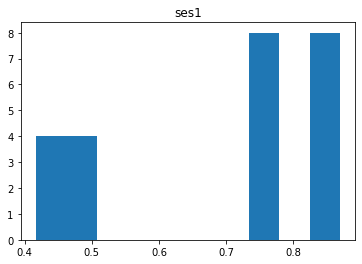

In [161]:
ses1_accs={'bedbench_bedchair': 0.75, 'bedbench_bedtable': 0.4166666666666667, 'bedbench_benchchair': 0.4782608695652174, 'bedbench_benchtable': 0.7391304347826086, 'bedchair_bedbench': 0.8695652173913043, 'bedchair_bedtable': 0.4166666666666667, 'bedchair_chairbench': 0.4782608695652174, 'bedchair_chairtable': 0.8333333333333334, 'bedtable_bedbench': 0.8695652173913043, 'bedtable_bedchair': 0.75, 'bedtable_tablebench': 0.7391304347826086, 'bedtable_tablechair': 0.8333333333333334, 'benchchair_benchbed': 0.8695652173913043, 'benchchair_benchtable': 0.7391304347826086, 'benchchair_chairbed': 0.75, 'benchchair_chairtable': 0.8333333333333334, 'benchtable_benchbed': 0.8695652173913043, 'benchtable_benchchair': 0.4782608695652174, 'benchtable_tablebed': 0.4166666666666667, 'benchtable_tablechair': 0.8333333333333334, 'chairtable_chairbed': 0.75, 'chairtable_chairbench': 0.4782608695652174, 'chairtable_tablebed': 0.4166666666666667, 'chairtable_tablebench': 0.7391304347826086}
plt.hist(list(ses1_accs.values()))
plt.title("ses1")

Text(0.5, 1.0, 'ses2')

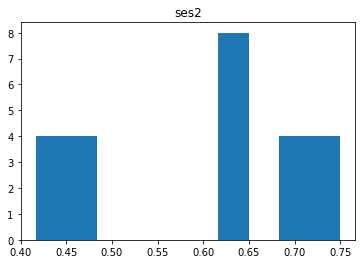

In [162]:
ses2_accs={'bedbench_bedchair': 0.625, 'bedbench_bedtable': 0.4583333333333333, 'bedbench_benchchair': 0.4166666666666667, 'bedbench_benchtable': 0.7083333333333334, 'bedchair_bedbench': 0.625, 'bedchair_bedtable': 0.4583333333333333, 'bedchair_chairbench': 0.4166666666666667, 'bedchair_chairtable': 0.75, 'bedtable_bedbench': 0.625, 'bedtable_bedchair': 0.625, 'bedtable_tablebench': 0.7083333333333334, 'bedtable_tablechair': 0.75, 'benchchair_benchbed': 0.625, 'benchchair_benchtable': 0.7083333333333334, 'benchchair_chairbed': 0.625, 'benchchair_chairtable': 0.75, 'benchtable_benchbed': 0.625, 'benchtable_benchchair': 0.4166666666666667, 'benchtable_tablebed': 0.4583333333333333, 'benchtable_tablechair': 0.75, 'chairtable_chairbed': 0.625, 'chairtable_chairbench': 0.4166666666666667, 'chairtable_tablebed': 0.4583333333333333, 'chairtable_tablebench': 0.7083333333333334}
plt.hist(list(ses2_accs.values()))
plt.title("ses2")

Text(0.5, 1.0, 'ses3')

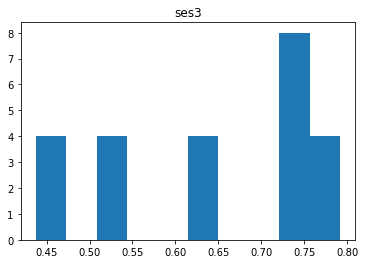

In [163]:
ses3_accs={'bedbench_bedchair': 0.7291666666666666, 'bedbench_bedtable': 0.4375, 'bedbench_benchchair': 0.5416666666666666, 'bedbench_benchtable': 0.7291666666666666, 'bedchair_bedbench': 0.625, 'bedchair_bedtable': 0.4375, 'bedchair_chairbench': 0.5416666666666666, 'bedchair_chairtable': 0.7916666666666666, 'bedtable_bedbench': 0.625, 'bedtable_bedchair': 0.7291666666666666, 'bedtable_tablebench': 0.7291666666666666, 'bedtable_tablechair': 0.7916666666666666, 'benchchair_benchbed': 0.625, 'benchchair_benchtable': 0.7291666666666666, 'benchchair_chairbed': 0.7291666666666666, 'benchchair_chairtable': 0.7916666666666666, 'benchtable_benchbed': 0.625, 'benchtable_benchchair': 0.5416666666666666, 'benchtable_tablebed': 0.4375, 'benchtable_tablechair': 0.7916666666666666, 'chairtable_chairbed': 0.7291666666666666, 'chairtable_chairbench': 0.5416666666666666, 'chairtable_tablebed': 0.4375, 'chairtable_tablebench': 0.7291666666666666}
plt.hist(list(ses3_accs.values()))
plt.title("ses3")

Text(0.5, 1.0, 'ses4')

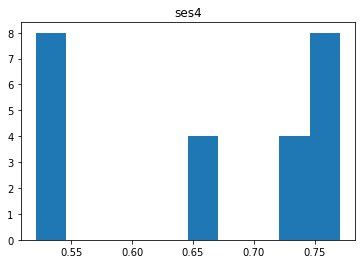

In [164]:
ses4_accs={'bedbench_bedchair': 0.75, 'bedbench_bedtable': 0.5319148936170213, 'bedbench_benchchair': 0.5208333333333334, 'bedbench_benchtable': 0.723404255319149, 'bedchair_bedbench': 0.7708333333333334, 'bedchair_bedtable': 0.5319148936170213, 'bedchair_chairbench': 0.5208333333333334, 'bedchair_chairtable': 0.6595744680851063, 'bedtable_bedbench': 0.7708333333333334, 'bedtable_bedchair': 0.75, 'bedtable_tablebench': 0.723404255319149, 'bedtable_tablechair': 0.6595744680851063, 'benchchair_benchbed': 0.7708333333333334, 'benchchair_benchtable': 0.723404255319149, 'benchchair_chairbed': 0.75, 'benchchair_chairtable': 0.6595744680851063, 'benchtable_benchbed': 0.7708333333333334, 'benchtable_benchchair': 0.5208333333333334, 'benchtable_tablebed': 0.5319148936170213, 'benchtable_tablechair': 0.6595744680851063, 'chairtable_chairbed': 0.75, 'chairtable_chairbench': 0.5208333333333334, 'chairtable_tablebed': 0.5319148936170213, 'chairtable_tablebench': 0.723404255319149}
plt.hist(list(ses4_accs.values()))
plt.title("ses4")

In [181]:
# AC_clf
model="bedbench_bedtable"
print(model)
for ses in range(1,5):
    print( f'day {ses}',end=' ')
    exec(f"print(ses{ses}_accs['{model}'])")

# AD_clf
model="bedchair_bedbench"
print(model)
for ses in range(1,5):
    print( f'day {ses}',end=' ')
    exec(f"print(ses{ses}_accs['{model}'])")

# CD_clf
model="bedtable_tablebench"
print(model)
for ses in range(1,5):
    print( f'day {ses}',end=' ')
    exec(f"print(ses{ses}_accs['{model}'])")

# BD_clf
model="bedchair_chairbench"
print(model)
for ses in range(1,5):
    print( f'day {ses}',end=' ')
    exec(f"print(ses{ses}_accs['{model}'])")

bedbench_bedtable
day 1 0.4166666666666667
day 2 0.4583333333333333
day 3 0.4375
day 4 0.5319148936170213
bedchair_bedbench
day 1 0.8695652173913043
day 2 0.625
day 3 0.625
day 4 0.7708333333333334
bedtable_tablebench
day 1 0.7391304347826086
day 2 0.7083333333333334
day 3 0.7291666666666666
day 4 0.723404255319149
bedchair_chairbench
day 1 0.4782608695652174
day 2 0.4166666666666667
day 3 0.5416666666666666
day 4 0.5208333333333334


In [38]:

import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
# import and set up environment
import sys
from subprocess import call
import nibabel as nib
import pydicom as dicom
import numpy as np
import time
import os
from glob import glob
import shutil
import pandas as pd
# from import convertDicomFileToNifti
from rtCommon.imageHandling import convertDicomImgToNifti, readDicomFromFile
from rtCommon.cfg_loading import mkdir,cfg_loading

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default='sub001.ses2.toml', type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=0, type=int, help='skip preprocess or not')
argParser.add_argument('--skipGreedy', '-g', default=0, type=int, help='skip greedy or not')
args = argParser.parse_args("")
from rtCommon.cfg_loading import mkdir,cfg_loading
# config="sub001.ses2.toml"
cfg = cfg_loading(args.config)

# def morphingTarget(cfg):
'''
purpose:
    get the morphing target function
steps:
    load train clf
    load brain data and behavior data
    get the morphing target function
        evidence_floor is C evidence for CD classifier(can also be D evidence for CD classifier)
        evidence_ceil  is A evidence in AC and AD classifier
'''

import os
import numpy as np
import pandas as pd
import joblib
import nibabel as nib



if 'milgram' in os.getcwd():
    main_dir='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/'
else:
    main_dir='/Volumes/GoogleDrive/My Drive/Turk_Browne_Lab/rtcloud_kp/'

working_dir=main_dir
os.chdir(working_dir)

runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]

objects = ['bed', 'bench', 'chair', 'table']

for ii,run in enumerate(actualRuns[:2]): # load behavior and brain data for current session
    t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
    # mask = nib.load(f"{cfg.chosenMask}").get_data()
    mask = np.load(cfg.chosenMask)
    t = t[:,mask==1]
    t = normalize(t)
    brain_data=t if ii==0 else np.concatenate((brain_data,t), axis=0)

    t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
    behav_data=t if ii==0 else pd.concat([behav_data,t])

# FEAT=brain_data.reshape(brain_data.shape[0],-1)
FEAT=brain_data
print("FEAT.shape=",FEAT.shape)
assert len(FEAT.shape)==2
# FEAT_mean=np.mean(FEAT,axis=1)
# FEAT=(FEAT.T-FEAT_mean).T
# FEAT_mean=np.mean(FEAT,axis=0)
# FEAT=FEAT-FEAT_mean

META=behav_data

# convert item colume to label colume
imcodeDict={
'A': 'bed',
'B': 'chair',
'C': 'table',
'D': 'bench'}
label=[]
for curr_trial in range(META.shape[0]):
    label.append(imcodeDict[META['Item'].iloc[curr_trial]])
META['label']=label # merge the label column with the data dataframe


# def classifierEvidence(clf,X,Y): # X shape is [trials,voxelNumber], Y is ['bed', 'bed'] for example # return a 1-d array of probability
#     # This function get the data X and evidence object I want to know Y, and output the trained model evidence.
#     targetID=[np.where((clf.classes_==i)==True)[0][0] for i in Y]
#     # Evidence=(np.sum(X*clf.coef_,axis=1)+clf.intercept_) if targetID[0]==1 else (1-(np.sum(X*clf.coef_,axis=1)+clf.intercept_))
#     Evidence=(X@clf.coef_.T+clf.intercept_) if targetID[0]==1 else (-(X@clf.coef_.T+clf.intercept_))
#     Evidence = 1/(1+np.exp(-Evidence))
#     return np.asarray(Evidence)

# def classifierEvidence(clf,X,Y):
#     ID=np.where((clf.classes_==Y[0])*1==1)[0][0]
#     p = clf.predict_proba(X)[:,ID]
#     BX=np.log(p/(1-p))
#     return BX

def classifierEvidence(clf,X,Y):
    ID=np.where((clf.classes_==Y[0])*1==1)[0][0]
    Evidence=(X@clf.coef_.T+clf.intercept_) if ID==1 else (-(X@clf.coef_.T+clf.intercept_))
    # Evidence=(X@clf.coef_.T+clf.intercept_) if ID==0 else (-(X@clf.coef_.T+clf.intercept_))
    return np.asarray(Evidence)


toml filename=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/projects/rtSynth_rt/conf/sub001.ses2.toml
FEAT.shape= (95, 546)


In [39]:
def clf_score(obj,altobj,clf,FEAT,META): # obj is A, altobj is B, clf is AC_clf
    ID = (META['label']==imcodeDict[obj]) + (META['label']==imcodeDict[altobj])
    X = FEAT[ID]
    Y = META['label'][ID]
    acc = clf.score(X, Y)
    print(f"{obj}_{altobj} accuracy = {acc}")

A_ID = (META['label']=='bed')
X = FEAT[A_ID]

# evidence_floor is C evidence for AC_CD BC_CD CD_CD classifier(can also be D evidence for CD classifier)




#try out other forms of floor: C evidence in AC and D evidence for AD


print("floor")
# D evidence for AD_clf when A is presented.
Y = ['bench'] * X.shape[0]
AD_clf=joblib.load(cfg.usingModel_dir +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
clf_score("A","D",AD_clf,FEAT,META)

floor
A_D accuracy = 0.7083333333333334


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [46]:
A_ID = (META['label']=='bed') | (META['label']=='chair')
a=META['label'][A_ID]
# A_ID = (META['label']=='bed') + (META['label']=='chair')
# b=META['label'][A_ID]
